## Simple Linear Regression 

In [1]:
# We can make a data set for regression manually or we can genrate a dataset from sklearn 
# for that we need sklearn.makeregression 

from sklearn.datasets import make_regression

# in order to use the metrics like mean absolute error or mean squared error we will use sklearn.metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pandas as pd
import numpy as np


n_samplesint, default=100
The number of samples.

n_featuresint, default=100
The number of features.

n_informativeint, default=10
The number of informative features, i.e., the number of features used to build the linear model used to generate the output.

In [23]:
# In simple linear regression we have only one independent feature and one dependent feature 
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=10)

In [24]:
X[:,0]

array([ 0.17116354, -1.40697849,  0.06598383,  0.29350299,  1.05576863,
        0.06143353,  0.10394948, -0.94211443,  0.40151315, -1.44536446,
        0.64662026,  0.2720475 , -1.85189799,  1.62480013, -3.53221154,
        0.31493114, -0.1183226 ,  0.58787401,  0.64800744, -0.9055148 ,
        2.02609545, -0.01320915,  0.03471379, -0.14226026,  0.99520408,
        0.43643164, -0.30838891,  0.28783249, -0.92743717, -0.71738751,
       -1.05322308,  0.15576272,  0.47598717,  0.5335856 , -0.70164922,
       -1.03930859, -0.8401123 ,  0.13012635,  0.55790702,  1.12964564,
       -0.60646063,  0.19524961,  0.25445454, -1.12923298, -0.63804202,
       -0.74390689, -0.52134088,  1.16856791,  1.17638698,  0.74812073,
        1.06342567, -0.51953203,  1.09923526,  0.19358361, -2.18032375,
       -0.68849244, -0.8078079 ,  0.89919389,  0.63886714,  0.05009331,
        0.23526923,  0.91691946, -0.56781442,  0.52611955, -0.9329251 ,
       -1.39591413, -0.0056565 ,  0.99762187, -0.38220981, -0.65

In [25]:
# lets convert this into a dataframe 
df = pd.DataFrame({'feature1':X[:,0], 'target':y})

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='feature1'>

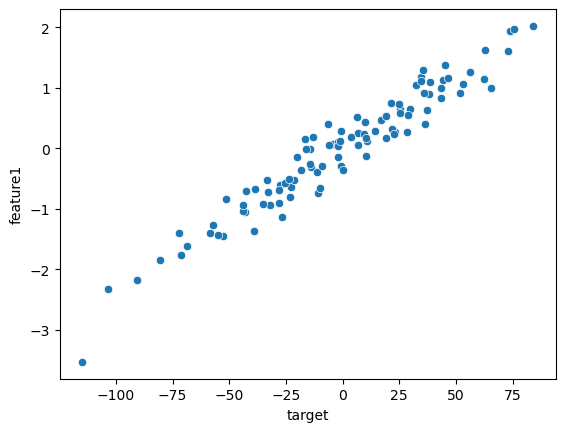

In [27]:
sns.scatterplot(df['target'], df['feature1'])

In [28]:
# to evaluate the model's performance we use test data and for that perpose we use train,test split 
from sklearn.model_selection import train_test_split


In [36]:
X = df[['feature1']]  # independent feature should be in 2D array, model requires 2D are to train
y = df['target']  # dependent feature will be in 1D array only 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

#### The most important point is standard scaling
- We do standardization in order to make model training faster. 
- Standardization reduces the scale and make values in between -3 to +3
- Standardized value have mean as 0 and std deviation of 1
- Standardization genrally used for ML problems, and min-max scaler genrally used for DL problems


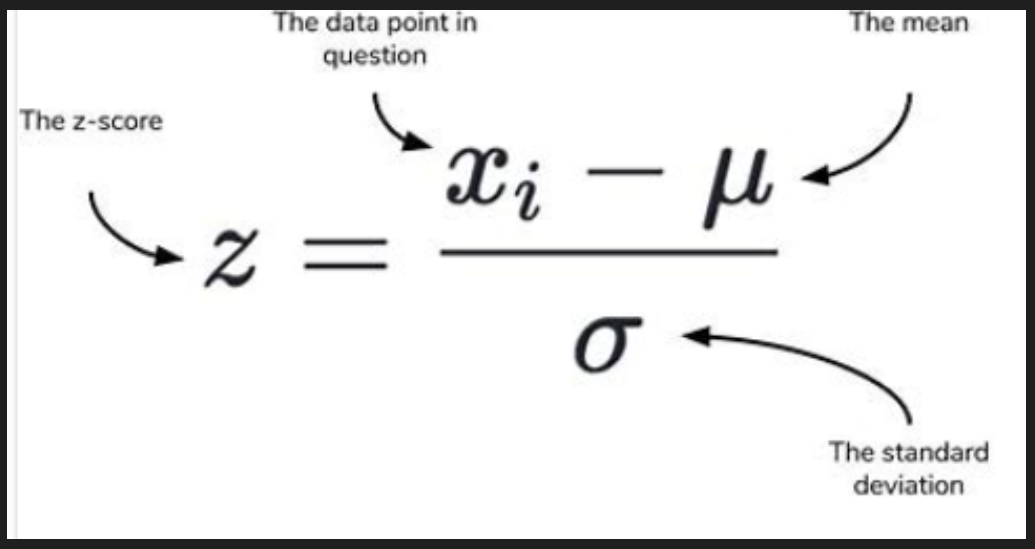


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# first we need to fit & transform the data 

scaler = StandardScaler()

In [45]:
# we'll do scaling for only X features 
# Why do we fit_transform train data and not the test data, the meaning of 'fit' is that it calculates the mean
# and standard deviation required from train data and then 'transform' means, applying that values into the formula
# So we only fit_transform the train data and not the test data, we only transform the test data 

X_train = scaler.fit_transform(X_train)

In [50]:
# we'll only transform the test data, and the reason is we are applying the calculated values of mean and Standard 
# deviation to this data 

 
X_test = scaler.transform(X_test)

##### We do not apply scaling on Output variable 

In [55]:
# to convert 2D array into 1D array we use this method 
X_train[::,0]

array([-0.29646917,  1.10789253,  1.02714597, -0.67870931,  1.34061326,
       -0.72928982, -0.05226518,  0.88026196,  0.06519557,  0.48845429,
        0.21608873, -0.74248053, -0.54398422,  1.0630479 , -1.08101062,
        1.0935367 , -0.78484717,  1.01946918,  0.02256998,  1.14039857,
        0.43819264,  1.99229818, -1.40801595,  0.60149262,  1.13255933,
       -0.40186629,  0.550368  ,  0.96117248, -1.48173936, -0.98356583,
        0.23753762,  0.12909689, -0.33163339,  1.9371363 ,  0.95874845,
        0.60926574,  0.36372447,  1.58049008, -0.84891296,  0.08848145,
       -0.18164907, -0.00421866, -1.31025088,  1.08052455,  0.61065649,
        0.24955276,  1.26539283,  0.86249068,  0.11714242, -1.43853574,
       -1.89569545, -0.7151528 , -1.09496099,  1.91559879,  0.3985351 ,
        1.58996804, -0.69150725, -1.80355787,  0.20573294, -0.55989371,
        0.71102795, -0.32708046,  0.69603329,  0.49593959, -0.60830061,
       -2.22496812,  0.23372706, -0.15764968, -0.88130066, -0.64

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='target'>

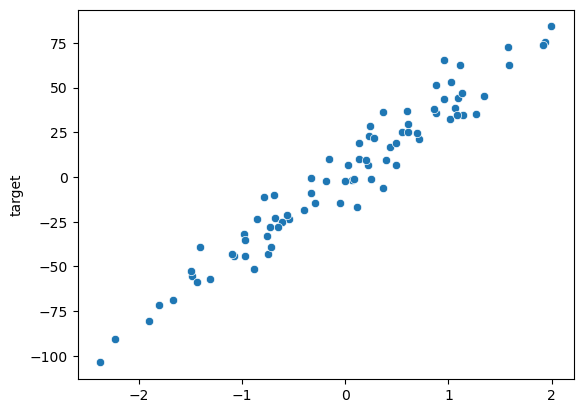

In [54]:
sns.scatterplot(X_train[::,0], y_train)

In [57]:
# import the model 
from sklearn.linear_model import LinearRegression

In [58]:
# fit the model for the train data 
regressor = LinearRegression()

In [59]:
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
# this is our y intercept given by the model 
regressor.intercept_

1.181777705577023

In [62]:
# this is slope of our model
regressor.coef_

array([40.27001043])

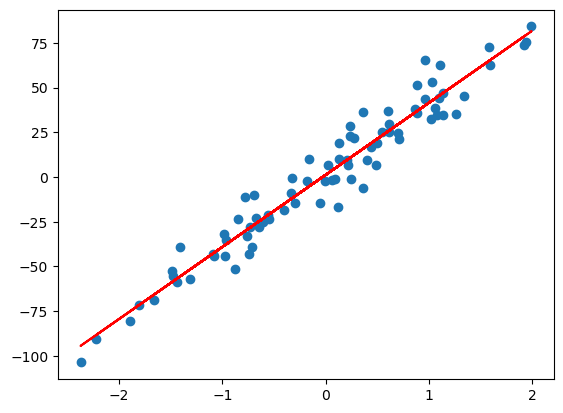

In [63]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted output= intercept +coef_(Weights)
2. y_pred_train =1.181777 + 40.27(X_train)
          
### prediction of test data
1. predicted output= intercept +coef_(Weights)
2. y_pred_test = 1.181777 + 40.27 (X_test)

In [64]:
# prediction for test data 
y_pred_test=regressor.predict(X_test)

In [66]:
y_pred_test, y_test

(array([ -36.94876047, -142.99863329,  -45.98112548,    4.86406531,
          -0.61801199,   11.4602097 ,   -6.27011033,    7.49334218,
          22.13521991,  -15.8209205 ,    2.27438422,  -57.19478273,
           9.10908854,    7.42607951,  -14.79769126,   33.4105986 ,
          50.55021183,  -12.84048634,    1.63282264,  -21.43817805]),
 19    -27.894534
 14   -114.859507
 43    -26.847321
 37     10.955830
 66    -16.195073
 3      14.148204
 79    -19.982847
 41    -13.153401
 38     28.742425
 68    -11.248864
 2      -4.237027
 1     -72.123063
 60     22.677189
 53      3.823896
 95      0.213202
 74     43.418600
 92     56.009680
 26    -14.011014
 59     -6.217659
 46    -33.536138
 Name: target, dtype: float64)

## Performance Metrics MAE,MSE,RMSE

In [67]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
mae = mean_absolute_error(y_true= y_test, y_pred= y_pred_test)
rmse = np.sqrt(mse)

print(mse,mae,rmse)

161.63662011395576 10.8215014196366 12.713639137318463


## Accuracy of the model R squared and Adjusted r ssquared
## R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [68]:
from sklearn.metrics import r2_score

In [69]:
score=r2_score(y_test,y_pred_test)
score

0.8816016102997405

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [70]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8750239219830594